imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

im loading the dataset

In [2]:
data = pd.read_csv('updated_pollution_dataset.csv')

In [3]:
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [4]:
print("\nMising Values in Air Quality Dataset:")
print(data.isnull().sum())


Mising Values in Air Quality Dataset:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [5]:
print("\nDuplicate Values in Air Quality Dataset:")
print(data.duplicated().sum())


Duplicate Values in Air Quality Dataset:
0


now im gonna encode categorical vaariabbles

In [6]:
encoder = LabelEncoder()
if 'Air Quality' in data.columns:
    data['Air Quality'] = encoder.fit_transform(data['Air Quality'])

Separating features and target variable for Air Quality


In [7]:
X = data.drop('Air Quality', axis=1)
y = data['Air Quality']

standardizing features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

and now spliting the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

hyperparameter tuningg using gridsearchcv

In [10]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 1], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
svm_air = grid_search.best_estimator_

making prediction

In [11]:
y_pred_air = svm_air.predict(X_test)

evaluation

In [12]:
print("\nAir Quality Classification Report:")
print(classification_report(y_test, y_pred_air))
print("\nAir Quality Accuracy:", accuracy_score(y_test, y_pred_air))



Air Quality Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.89      0.81      0.85       111
           2       0.95      0.96      0.96       294
           3       0.83      0.87      0.85       186

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000


Air Quality Accuracy: 0.942


visualizations

distibutions


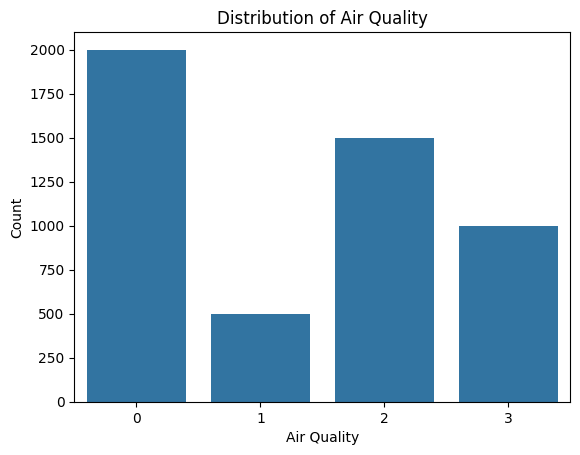

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Air Quality', data=data)
plt.title('Distribution of Air Quality')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()

correlation

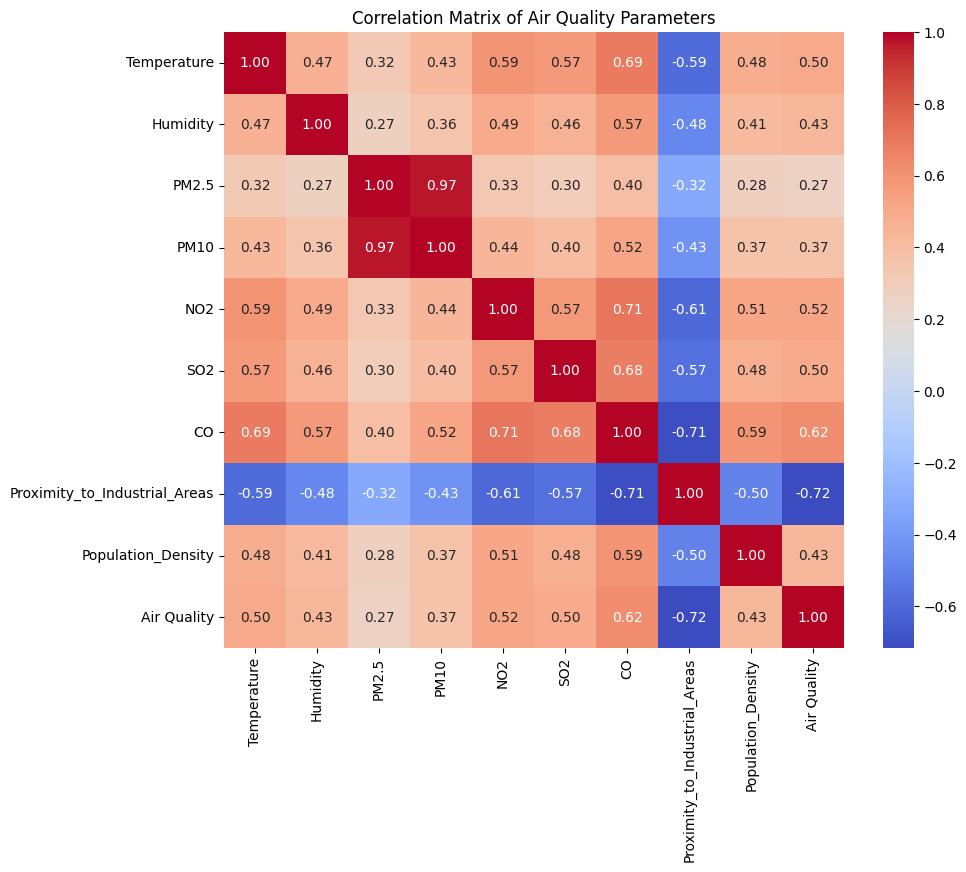

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Parameters')
plt.show()

scatterplot of 2 features


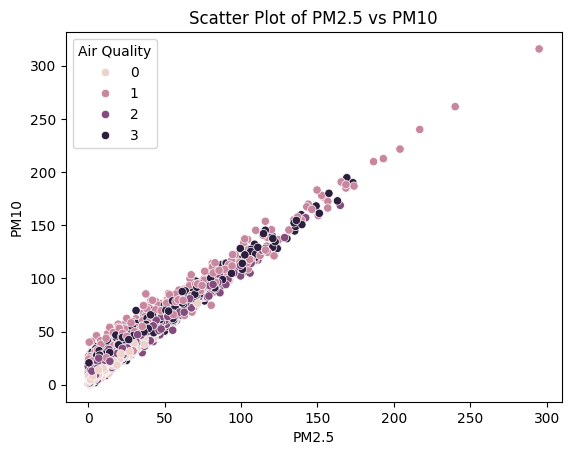

In [15]:
sns.scatterplot(x='PM2.5', y='PM10', hue='Air Quality', data=data)
plt.title('Scatter Plot of PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()

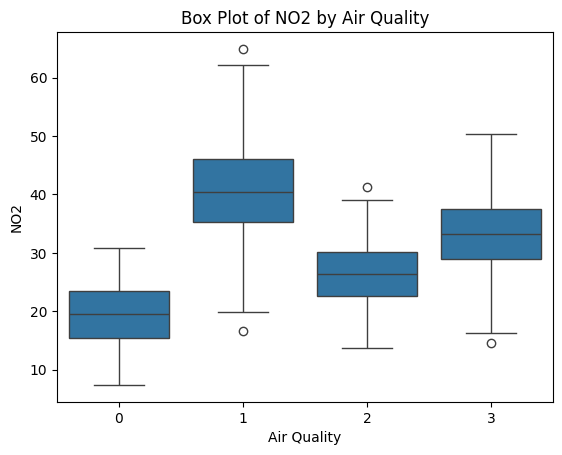

In [16]:
sns.boxplot(x='Air Quality', y='NO2', data=data)
plt.title('Box Plot of NO2 by Air Quality')
plt.xlabel('Air Quality')
plt.ylabel('NO2')
plt.show()